# Jolo Sesbreno

## Research question/interests

I am interested in the different costs between Male and Female. I would like to check the trends as both sexes grow, how much their medical expenses come up to be. This can help gauge at what point in their life does each sex's average costs is their highest and when it is at it's lowest. While the obvious answer seems that it would be highest in an adult's late age, I am more interested in the teenage to middle age years.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path 

In [3]:
dfRaw = pd.read_csv("../data/raw/insurance/insurance.csv")
dfRaw

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Milestone 3:
### Task 1: EDA


In [4]:
dfRaw.shape

(1338, 7)

Above indicates the amount of rows (1338) and columns (7) of the raw dataframe.

In [6]:
dfRaw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Above indicates the top 5 rows of the raw dataframe.

In [7]:
dfRaw.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Above shows the amount of unique values in each column.

In [11]:
dfRaw.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
Above shows a description of each column.

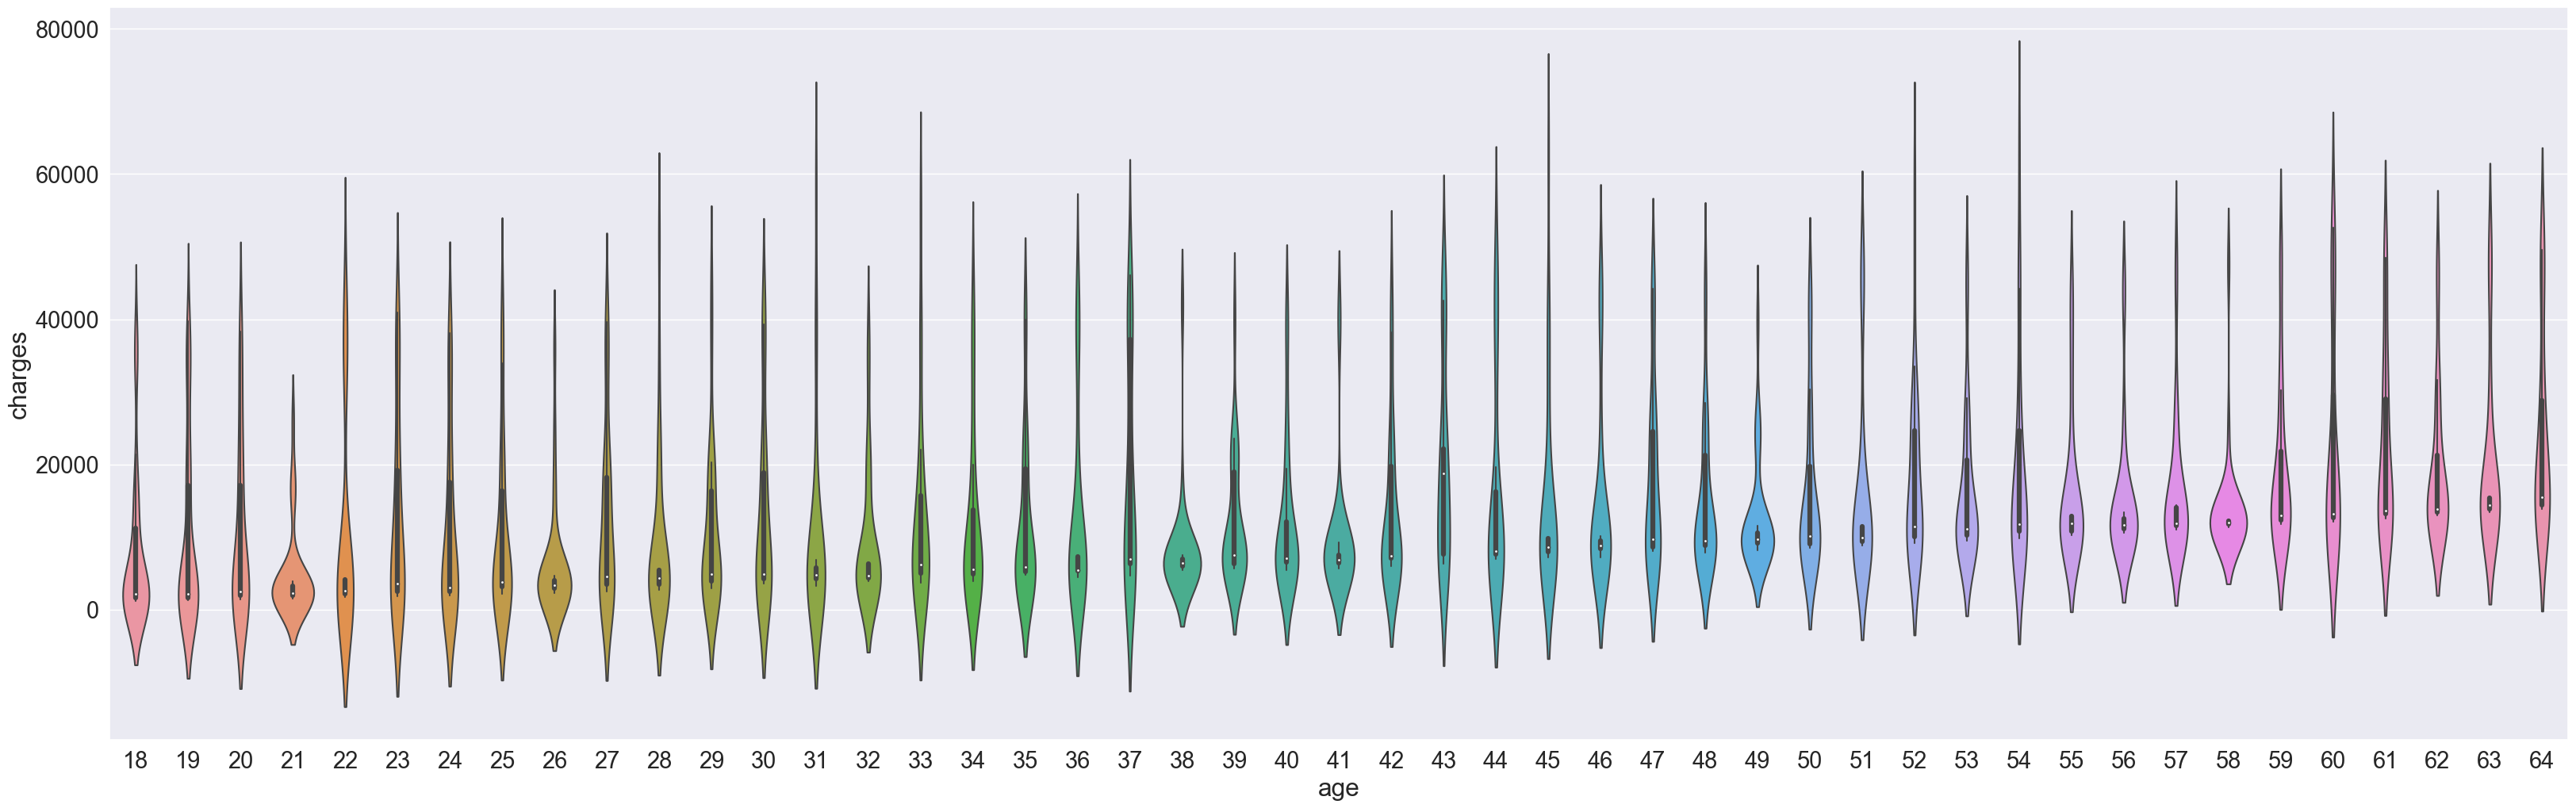

In [29]:
x = sns.violinplot(data = dfRaw, x = 'age', y = 'charges')
x = sns.set(rc={'figure.figsize':(40,12)})
x = sns.set(font_scale=4)
x

The above violin plot shows the slow yet constant growth of expenses as age increases, but it also greatly shows some outliers between each ages.

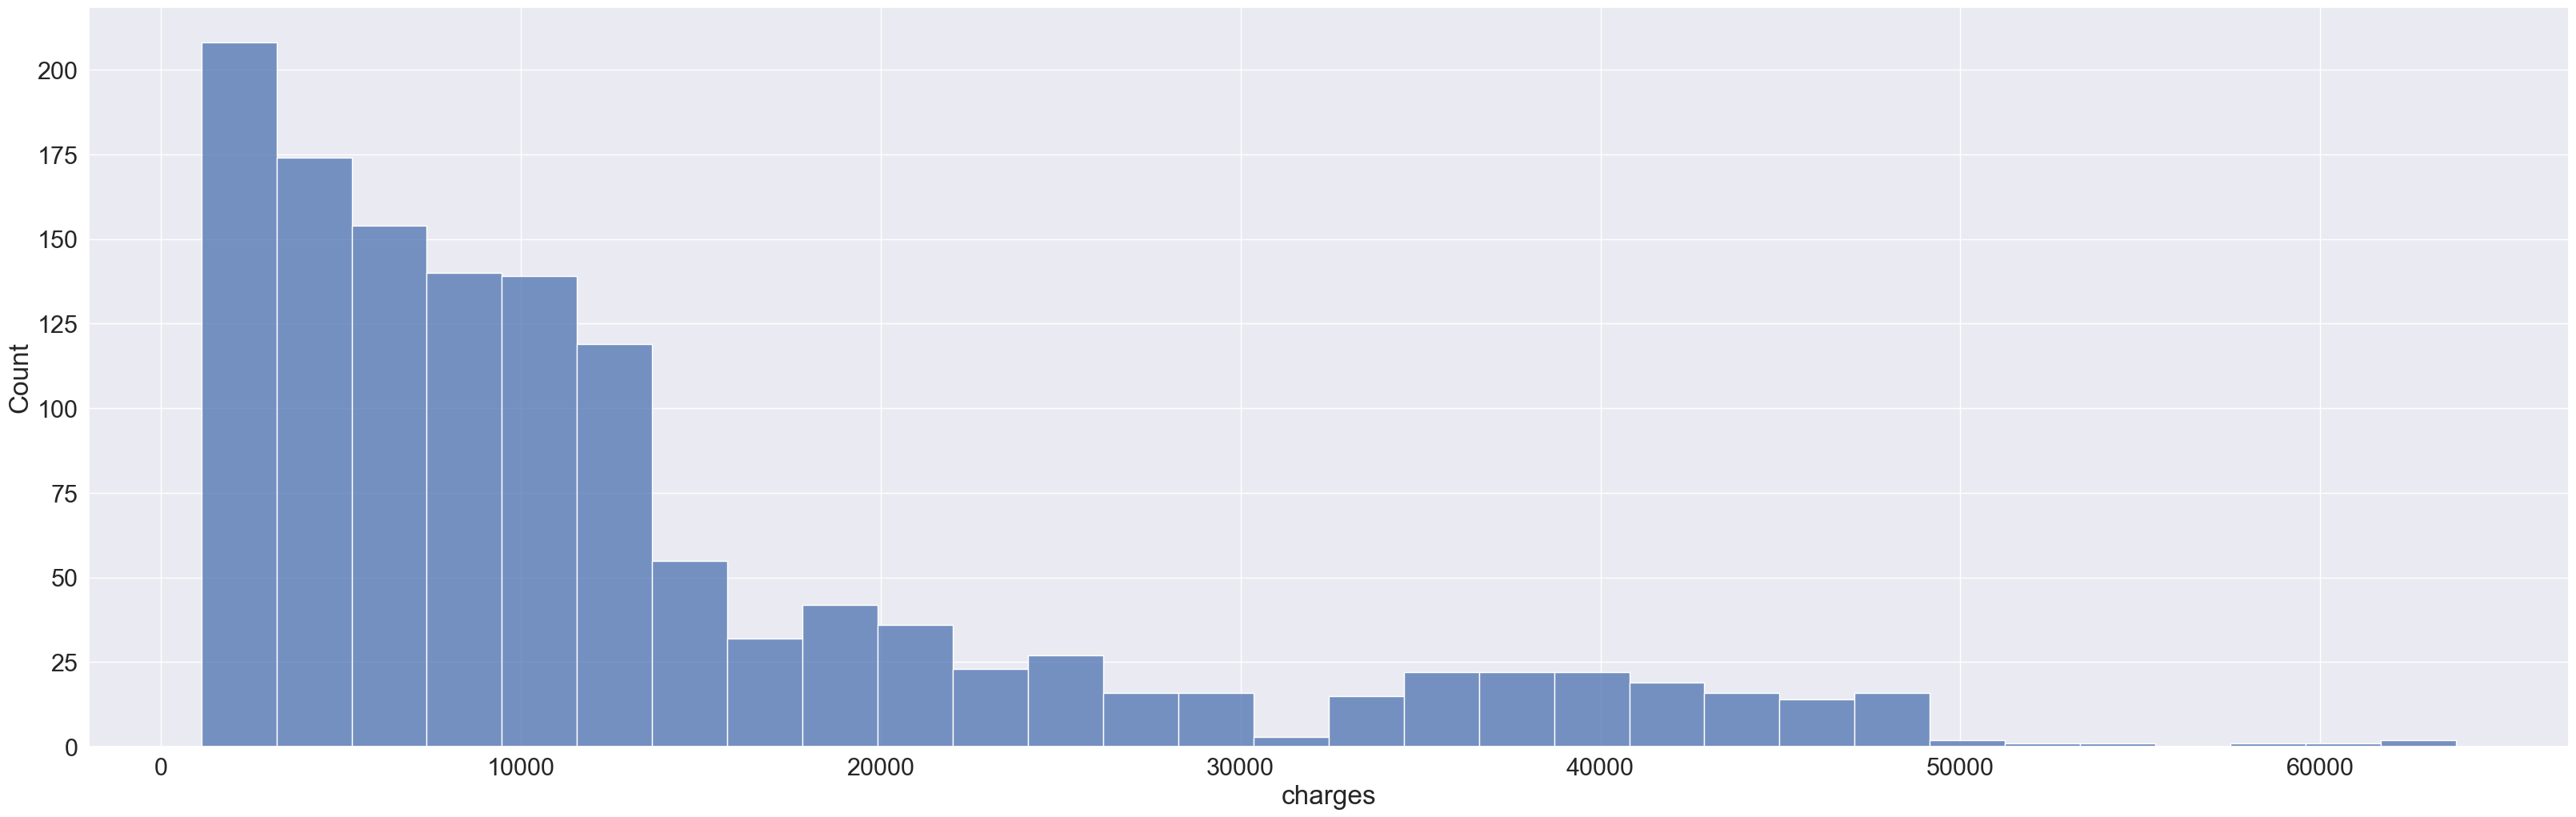

In [12]:
y = sns.histplot(dfRaw['charges'], bins = 30)
y = sns.set(font_scale=0.5)
y

The above shows a histogram plot shows the frequency of charges among the population. This shows the most common charges appear closer to 0 and less people pay the more severe charges.

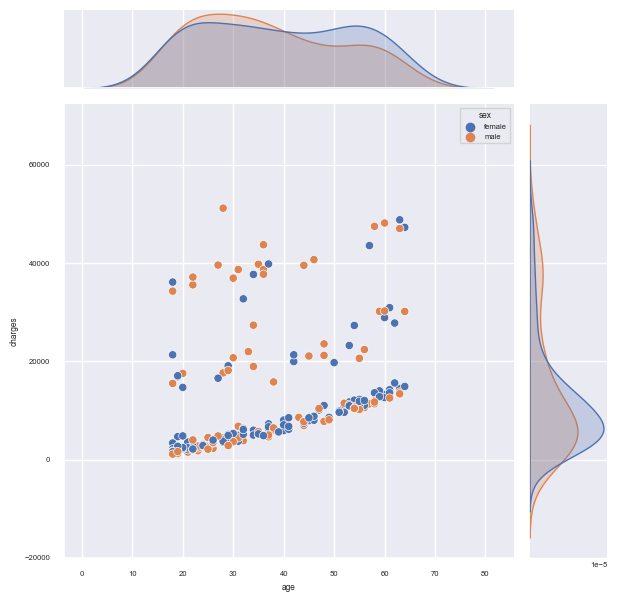

In [43]:
z = sns.jointplot(data = dfRaw.head(200), x ='age', y = 'charges', hue = 'sex')
z = sns.set(rc={'figure.figsize':(600,600)})
z = sns.set(font_scale=0.5)
z

The above shows a joint plot similar to a histogram plot but more clearly showing the difference in genders. With a near even amount of male and female, the numbers look to be average with an average growth as the sexes grow older.

### Task 2: Analysis Pipeline

Data cleanup:
    Since my research relies on age, sex, and expenses/charges; the other columns will be relevant. While they may 
    provide some context to one's expenses, my research will treat all data as equal except for my chosen columns.

In [10]:
dfRaw = pd.read_csv("../data/raw/insurance/insurance.csv")
dfRaw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Columns to be taken out: bmi, children, smoker, and region.

In [11]:
dfClean = dfRaw.copy().drop(['bmi', 'children','smoker', 'region'], axis=1).dropna(axis=0)
dfClean.head()

,age,sex,charges
0,19,female,16884.92400
1,18,male,1725.55230
2,28,male,4449.46200
3,33,male,21984.47061
4,32,male,3866.85520


The unwanted columns have been taken out. Next, I will round the charges up to the nearest cent to avoid clutter from the extra decimals.

In [12]:
dfClean['charges'] = dfClean['charges'].round(decimals = 2)
dfClean.head()

,age,sex,charges
0,19,female,16884.92
1,18,male,1725.55
2,28,male,4449.46
3,33,male,21984.47
4,32,male,3866.86


Now, I have all the data I need in an organized way!

### Task 3: Method Chaining

All changes above has been put into project_functions3.py and I will use that to effectively process my dataframe the way I wanted.

In [4]:
import project_functions3 as p3

In [5]:
dfClean = p3.load_and_process("../data/raw/insurance/insurance.csv")
dfClean.head()

filepath = Path('../data/processed/Sesbreno_Data.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
dfClean.to_csv(filepath)

This looks exactly like the one just above it, meaning the function works! I will also export the wrangled data to be used in my Tableau dashboard for Milestone 4

### Task 4: Analysis

One of the plots from Task 1 is similar to what I was looking for in terms of seeing trends and scaling between sex, age, and charges. I will use a scatterplot to analyze it for a detailed conclusion. 

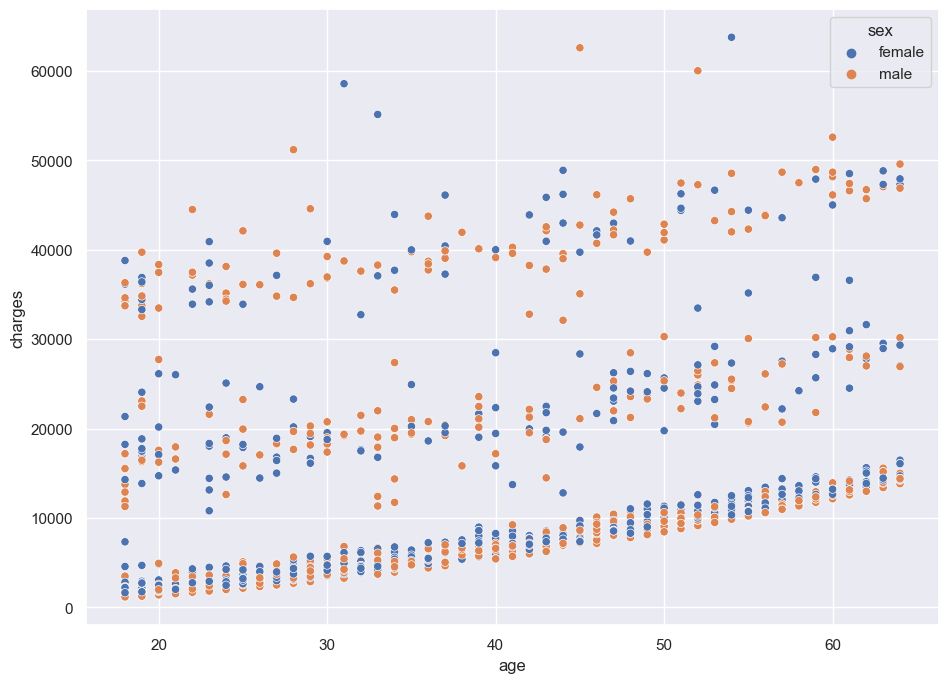

In [10]:
z = sns.scatterplot(data = dfClean, x ='age', y = dfClean['charges'], hue = 'sex')
z = sns.set(rc={'figure.figsize':(11,8)})

The plot above shows the relationship between age and charges for both sexes. This covers all ages and as shown, shows a slow growth in charges as the people get older. This plot best shows where the most common charges are, which is represented by the clumps of dots that grow together. It also shows outliers as individual dots away from the common clump.

In [6]:
dfMale = dfClean[dfClean["sex"] == "male"]
print(dfMale)
dfFemale = dfClean[dfClean["sex"] == "female"]
print(dfFemale)

      age   sex   charges
1      18  male   1725.55
2      28  male   4449.46
3      33  male  21984.47
4      32  male   3866.86
8      37  male   6406.41
...   ...   ...       ...
1324   31  male   4239.89
1325   61  male  13143.34
1327   51  male   9377.90
1329   52  male  10325.21
1333   50  male  10600.55

[676 rows x 3 columns]
      age     sex   charges
0      19  female  16884.92
5      31  female   3756.62
6      46  female   8240.59
7      37  female   7281.51
9      60  female  28923.14
...   ...     ...       ...
1332   52  female  11411.68
1334   18  female   2205.98
1335   18  female   1629.83
1336   21  female   2007.94
1337   61  female  29141.36

[662 rows x 3 columns]


To better differentiate trends between sexes as they get older, I made two seperate dataframes containing only each sex respectively. I will then put both in a scatterplot and draw my final conclusions from there.

Text(0.5, 1.0, 'Male Expenses Over Age')

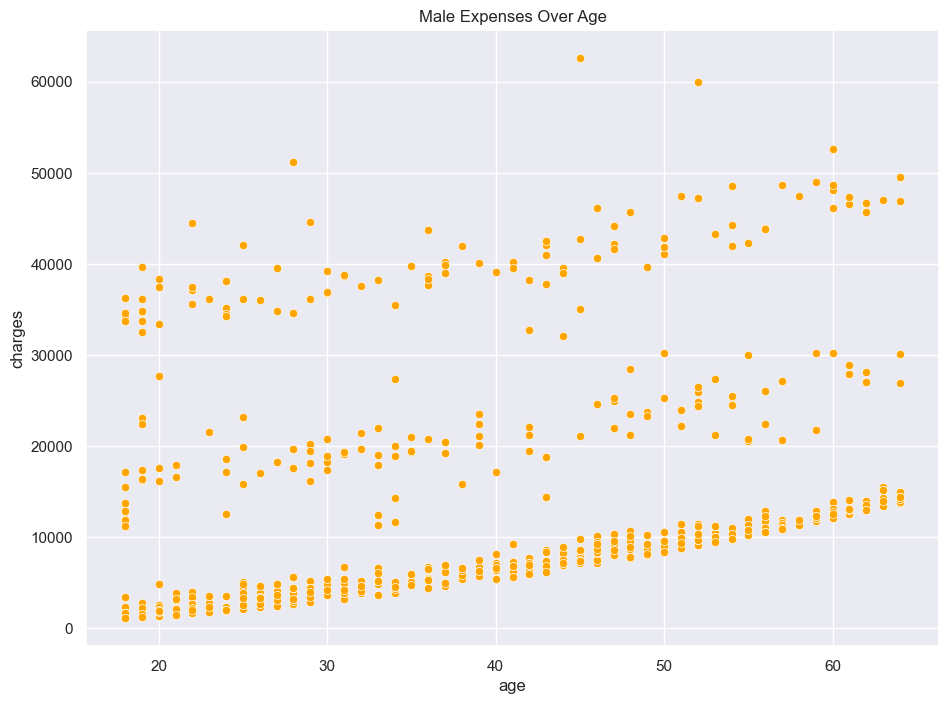

In [22]:
sns.scatterplot(data = dfMale, x ='age', y = 'charges', color = 'orange')
plt.title("Male Expenses Over Age")

Text(0.5, 1.0, 'Female Expenses Over Age')

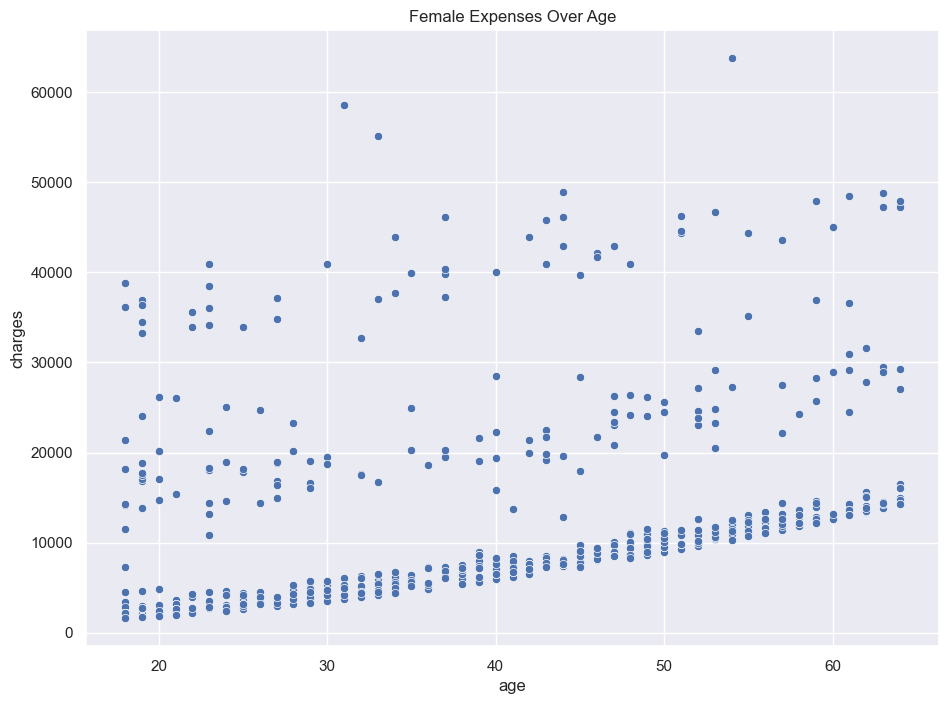

In [21]:
sns.scatterplot(data = dfFemale, x ='age', y = 'charges')
plt.title("Female Expenses Over Age")

The sex-separated dataframes were plotted above with their fitting colours from the main graph. From this, it is much easier to see the total amount of male and female in certain charges at certain ages. With all of these separate plots, I can draw a conclusion which I will write below

### Conclusion

Above, there are 3 visual guidelines that help answer my research question: as both sexes age, how much does their medical charges come up to be? 

To simply put it, different individuals live very different lives which varies medical charges from person to person. This results in a plot with a lot of seemingly 'random' dots that point to each individual.

With all of this, there are still a lot of conclusions and assumptions to be made!

In my first scatterplot, it is safe to conclude that as one ages, their medical expenses also increase, regardless of ones sex. A few safe assumptions for this cause could be: underlying health conditions as age progresses, more responsibilities in medical expenses (ie out of parent's insurance), or life-lasting injuries that require constant treatment (in cases of higher charges).

Between the two genders and two scatterplots, the consistency remains similar: Age goes up, so does medical expenses. However, one noticeable difference is the consistency of the 'clumps' of people as the age goes up. 

For both genders, there is a consistent clump from less than 10 thousand to around 15 thousand. These could be assumed as routine check-ups, common diseases, or natural events (ie pregnancy, one-time injuries)

For males, there seems to be another consistent clump from around 15 thousand to 20 thousand and another smaller yet visible clump from 35 thousand to 45 thousand.
For females, this appears more random as dots fluctuate the plot. These fluctations appear more commom in their 20s, then reduce in ther 30s and returns in their mid 40s onwards.

To conclude, there is no clear differences between medical expenses as people age within males and females. Together, medical expenses rise as people grow older. Males find themselves consistently paying higher charges that increase as they age; while females charges appears more random in the earlier ages, but then slowly pay at a steady rate.

## Milestone 5

The major feedback I got was that my plots appear to be overplotted and crowded which may hinder in gathering pruposeful conclusions to my data. To resolve this, I took the first 200 indexes (which is unsorted) of the separate Male and Female dataframes. I also added a regression line to input the most common trends between each respective dataframes.

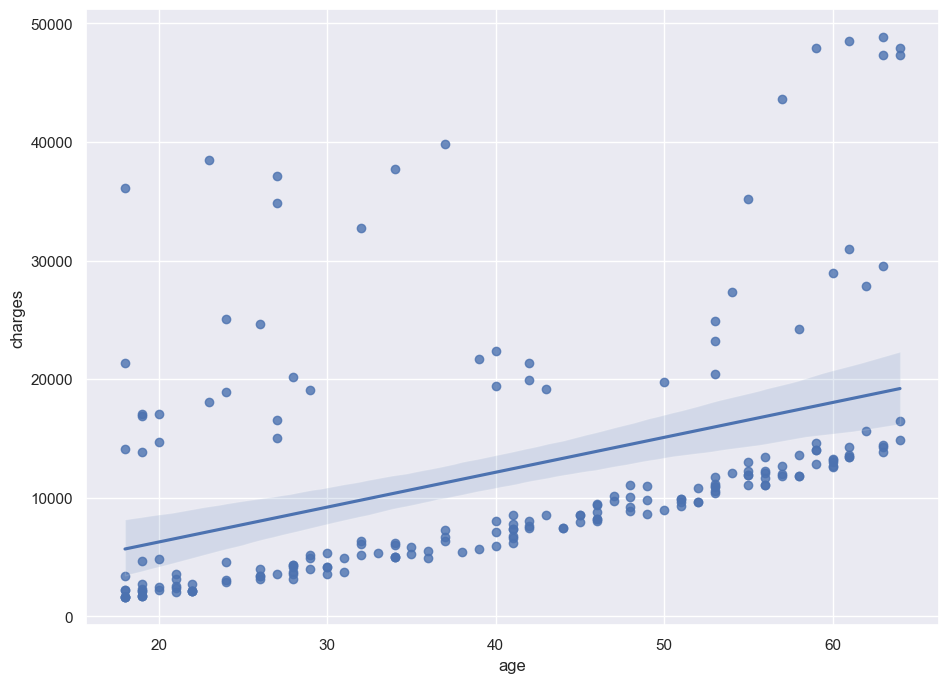

In [9]:
female = sns.regplot(data = dfFemale.head(200), x ='age', y = 'charges')
female = sns.set(rc={'figure.figsize':(12,16)})

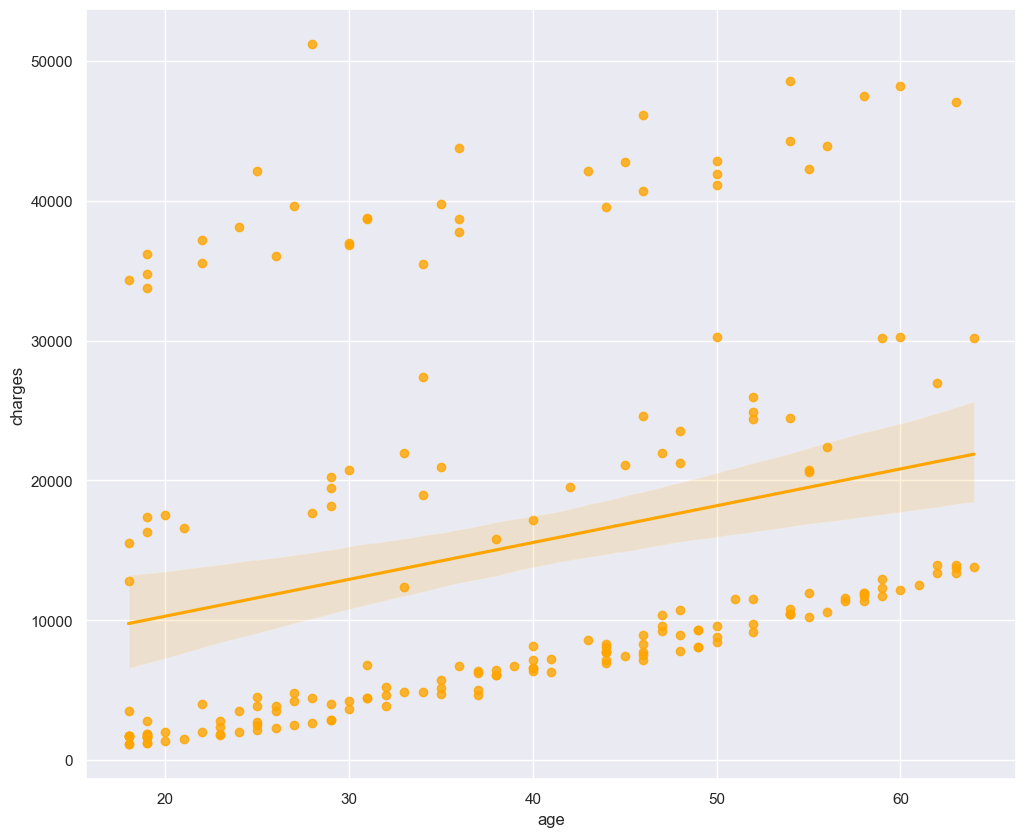

In [8]:
male = sns.regplot(data = dfMale.head(200), x = 'age', y = 'charges', color = 'orange')
male = sns.set(rc={'figure.figsize':(12,16)})

With these new plots, the same conclusions still applies but with a much better supporting visualization. The Female dataframe finds consistency in the lower ends of the expenses and shows sporadic outliers which can drag averages up and down. While the Male dataframe, the consistency appears to climb at a higher rate and the outliers appear to also consistently rise altogether.